Antes de comenzar con el dashbord, validaremos la información colocada en la base master roas.

Generaremos los resumenes que serán más usados en el dashbord y contestaremos las preguntas más frecuentes sobre está información.

    ¿Cuanta inversión tengo a nivel agencia?
    ¿Cuanto dinero gaste a nivel agencia?
    ¿Salud de las cuentas ROA?
    
Primero necesitamos tener la certeza que la información de la base master roas sea la misma que en sus archivos base KPIS 2020

In [1]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
  </form>'
)


#Paqueterías
options(scipen=999)

library(gridExtra) ; library(tidyr) ; library(dplyr) ; library(ggplot2) ; library(lubridate) ; library(stringr) ; library(cowplot) ; library(ggthemes) ; library(readxl)

#funcion de apoyo para el formato de numeros
fn <- function(x){
  format(x, digits=9, decimal.mark=".",
         big.mark=",",small.mark=",", small.interval=3)  
}

#Supime los warnings
options(warn=-1)

options(repr.plot.width = 25, repr.plot.height = 8)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map




## Validación archivo KPIS y base master roas (inversión)

Observando el archivo, tenemos las siguientes columnas y tipos de datos

In [57]:
KPIS <- read_excel("~/Dropbox/ROAS 2020/KPIS 2020 - AdSocial.xlsx",sheet = "KPIS MP 2020", skip = 2)

names(KPIS)

[1] "CLIENTE"              "MARCA"                "CAMPAÑA"             
 [4] "Mes"                  "Versión"              "NOMENCLATURA"        
 [7] "Plataforma"           "Formato"              "Inicio"              
[10] "Fin"                  "TDC"                  "Objetivo"            
[13] "Costo Planeado"       "KPI Planeado"         "Serving"             
[16] "Inversión Plataforma" "Inversión Total"

In [58]:
str(KPIS)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1017 obs. of  17 variables:
 $ CLIENTE             : chr  "GICSA" "GICSA" "GICSA" "GICSA" ...
 $ MARCA               : chr  "Explanda Pachuca" "Explanada Puebla" "Explanada Puebla" "Forum Cuernavaca" ...
 $ CAMPAÑA             : chr  "Explanda Pachuca - Temporalidad Rebajas" "Explanada Puebla - Temporalidad Rebajas" "Explanada Puebla - Pasaporte" "Forum Cuernavaca - Temporalidad Rebajas" ...
 $ Mes                 : chr  "Enero" "Enero" "Enero" "Enero" ...
 $ Versión             : chr  "V2" "V2" "V2" "V2" ...
 $ NOMENCLATURA        : chr  "2001_GICSA_ExplanadaPachuca_PI_MKT" "2001_GICSA_ExplanadaPuebla_PI_MKT" "2001_GICSA_ExplanadaPuebla_PI_MKT" "2001_GICSA_ForumCuernavaca_PI_MKT" ...
 $ Plataforma          : chr  "Google Search" "Google Search" "Google Search" "Google Search" ...
 $ Formato             : chr  "Text Ads" "Text Ads" "Text Ads" "Text Ads" ...
 $ Inicio              : POSIXct, format: "2020-01-01" "2020-01-01" ...
 $ Fin          

In [59]:
head(KPIS)

CLIENTE,MARCA,CAMPAÑA,Mes,Versión,NOMENCLATURA,Plataforma,Formato,Inicio,Fin,TDC,Objetivo,Costo Planeado,KPI Planeado,Serving,Inversión Plataforma,Inversión Total
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
GICSA,Explanda Pachuca,Explanda Pachuca - Temporalidad Rebajas,Enero,V2,2001_GICSA_ExplanadaPachuca_PI_MKT,Google Search,Text Ads,2020-01-01,2020-01-31,CPC,Clics,12.00,1075.0,0.0,12900.0,12900.0
GICSA,Explanada Puebla,Explanada Puebla - Temporalidad Rebajas,Enero,V2,2001_GICSA_ExplanadaPuebla_PI_MKT,Google Search,Text Ads,2020-01-01,2020-01-31,CPC,Clics,12.00,358.0,0.0,4300.0,4300.0
GICSA,Explanada Puebla,Explanada Puebla - Pasaporte,Enero,V2,2001_GICSA_ExplanadaPuebla_PI_MKT,Google Search,Text Ads,2020-01-01,2020-01-31,CPC,Clics,12.00,358.0,0.0,4300.0,4300.0
GICSA,Forum Cuernavaca,Forum Cuernavaca - Temporalidad Rebajas,Enero,V2,2001_GICSA_ForumCuernavaca_PI_MKT,Google Search,Text Ads,2020-01-01,2020-01-31,CPC,Clics,12.00,358.0,0.0,4300.0,4300.0
Acer,Acer,Acer - En Casa,Abril,V1,2004_Acer_EnCasa_PI_MKT,Facebook,Link Ads / Carousel Ads,2020-04-06,2020-04-30,CPC,Clics,4.35,3002.0,$ -,13050.0,13050.0
Acer,Acer,Acer - Acer Predator,Abril,V2,2004_Acer_ClickToBuy_PI_MKT,Facebook,Link Ads / Carousel Ads,2020-04-08,2020-04-30,CPC,Clics,4.35,7586.0,$ -,33000.0,33000.0


### ¿Cuanta inversión total tenemos en el archivos de kpis?

1. Resumen por Mes, Plataforma, Versión, Nomenclatura, llave_unica_mp.

In [75]:
#Formato de columnas numericas 
KPIS$`KPI Planeado` <- as.integer(KPIS$`KPI Planeado`)
KPIS$Serving <- as.integer(KPIS$Serving)
KPIS$`Inversión Plataforma` <- as.integer(KPIS$`Inversión Plataforma`)
KPIS$`Inversión Total` <- as.integer(KPIS$`Inversión Total`)

#Remplazo de abreviacion plataforma
KPIS$Plataforma <- trimws(KPIS$Plataforma)
KPIS$Plataforma <- str_replace_all(KPIS$Plataforma," ","")
KPIS$NOMENCLATURA <- tolower(KPIS$NOMENCLATURA)

KPIS['Plataforma_abreviacion'] <- str_replace_all(KPIS$Plataforma, c("Adform" = "dsp",
                                                      "AdsMovil" = "PV_AdsMovil",
                                                      "Content" = "PV_Content",
                                                      "DisplayAd" = "dsp",
                                                      "Facebook/Instagram" = "fb",
                                                      "Facebook" = "fb",
                                                      "Instagram" = "fb",
                                                      "GoogleSearch" = "sem",
                                                      "GoogleGDN" = "sem",
                                                      "Google" = "sem",
                                                      "Mobile" = "PV_Mobile",
                                                      "Programmatic\\(Herolense-Acuity\\)" = "dsp",
                                                      "Programmatic\\(Herolense\\)" = "dsp",
                                                      "Programmatic" = "dsp",
                                                      "PushNotification" = "PV_Push Notification",
                                                      "Spotify&Others" = "PV_Spotify & Others",
                                                      "Waze" = "PV_Waze"))

#Clasificación de las plataformas 
#table(KPIS$Plataforma)

KPIS['llave_unica_mp'] <- paste0(KPIS$NOMENCLATURA,"_",KPIS$Plataforma_abreviacion,"_",KPIS$Versión)

kpis_1 <- KPIS %>%
  group_by(Mes,Plataforma_abreviacion,Versión,NOMENCLATURA, llave_unica_mp) %>%
  summarize(Conteo = n(), 
            kpi_planeado = sum(`KPI Planeado`,na.rm = TRUE),
            serving = sum(Serving,na.rm = TRUE),
            inversion_plataforma = sum(`Inversión Plataforma`,na.rm = TRUE),
            inversion_total_original = sum(`Inversión Total`,na.rm = TRUE))

head(kpis_1, 10)

Mes,Plataforma_abreviacion,Versión,NOMENCLATURA,llave_unica_mp,Conteo,kpi_planeado,serving,inversion_plataforma,inversion_total_original
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
Abril,dsp,V1,2004_od_ao-mkt_pi_mkt,2004_od_ao-mkt_pi_mkt_dsp_V1,1,1420311,1874,51485,53360
Abril,dsp,V1,2004_od_bionet_ppf_pfm,2004_od_bionet_ppf_pfm_dsp_V1,1,550983,727,19972,20700
Abril,dsp,V1,2004_od_brother-impresion_ppf_pfm,2004_od_brother-impresion_ppf_pfm_dsp_V1,2,112280,148,4070,4218
Abril,dsp,V1,2004_od_brother-rotuladores_ppf_pfm,2004_od_brother-rotuladores_ppf_pfm_dsp_V1,1,84866,112,3076,3188
Abril,dsp,V1,2004_od_hp_ppf_pfm,2004_od_hp_ppf_pfm_dsp_V1,2,2448812,3231,88767,92000
Abril,dsp,V1,2004_od_izettle_ppf_pfm,2004_od_izettle_ppf_pfm_dsp_V1,1,128563,169,4660,4830
Abril,dsp,V1,2004_od_mercadopago_ppf_pfm,2004_od_mercadopago_ppf_pfm_dsp_V1,1,0,0,0,0
Abril,dsp,V1,2004_od_microsoft_ppf_pfm,2004_od_microsoft_ppf_pfm_dsp_V1,1,1004013,1325,36394,37720
Abril,dsp,V1,2004_petco_ao-ecomm_pi_pfm,2004_petco_ao-ecomm_pi_pfm_dsp_V1,1,1224406,1616,44383,46000


In [176]:
#La llave unica no repite valores y es la que ocuparemos para cruzar con plataformas
length(kpis_1$llave_unica_mp)
dim(kpis_1)

[1] 610

[1] 610  10

In [184]:
#filter(kpis_1,Conteo > 1)

#Al agrupar por llave unica perdemos los valores de formato y objetivo
filter(KPIS, llave_unica_mp == "2001_gicsa_paseoqueretaro_pi_mkt_FB_V2")

CLIENTE,MARCA,CAMPAÑA,Mes,Versión,NOMENCLATURA,Plataforma,Formato,Inicio,Fin,TDC,Objetivo,Costo Planeado,KPI Planeado,Serving,Inversión Plataforma,Inversión Total,Plataforma_abreviacion,llave_unica_mp
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>
GICSA,Querétaro,Querétaro - Temporalidad,Enero,V2,2001_gicsa_paseoqueretaro_pi_mkt,Facebook/Instagram,Alcance,2020-01-01,2020-01-31,CPC,Clics,4.0,3750,0,15000,15000,FB,2001_gicsa_paseoqueretaro_pi_mkt_FB_V2
GICSA,Querétaro,Querétaro - Temporalidad,Enero,V2,2001_gicsa_paseoqueretaro_pi_mkt,Instagram,Instastories,2020-01-01,2020-01-31,CPV,Views,0.3,35833,0,10750,10750,FB,2001_gicsa_paseoqueretaro_pi_mkt_FB_V2
GICSA,Querétaro,Amplificación,Enero,V2,2001_gicsa_paseoqueretaro_pi_mkt,Facebook/Instagram,Amplificación,2020-01-01,2020-01-31,CPE,Interacciones,3.5,10994,0,38480,38480,FB,2001_gicsa_paseoqueretaro_pi_mkt_FB_V2
GICSA,Querétaro,Querétaro - Pasaporte,Enero,V2,2001_gicsa_paseoqueretaro_pi_mkt,Facebook/Instagram,Alcance,2020-01-01,2020-01-31,CPC,Clics,4.0,1250,0,5000,5000,FB,2001_gicsa_paseoqueretaro_pi_mkt_FB_V2
GICSA,Querétaro,Querétaro - Pasaporte,Enero,V2,2001_gicsa_paseoqueretaro_pi_mkt,Instagram,Instastories,2020-01-01,2020-01-31,CPV,Views,0.3,35833,0,10750,10750,FB,2001_gicsa_paseoqueretaro_pi_mkt_FB_V2


Podemos ver que en el archivo tenemos otras columnas (Formato, Objetivo), pero con la siguiente agrupación garantizamos que nuestras campañas son unicas.

#### Resumen por Mes, Plataforma y Versión

In [188]:
kpis_2 <- kpis_1 %>% 
  group_by(Mes,Plataforma_abreviacion,Versión) %>%
  summarize(Conteo = n(),
            kpi_planeado = sum(kpi_planeado,na.rm = TRUE),
            serving = sum(serving, na.rm = TRUE),
            inversion_plataforma = sum(inversion_plataforma,na.rm = TRUE),
            inversion_total = sum(inversion_total,na.rm = TRUE))

head(kpis_2,10)

Mes,Plataforma_abreviacion,Versión,Conteo,kpi_planeado,serving,inversion_plataforma,inversion_total
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
Enero,DSP,V1,8,2759813,3638,100038,103684
Enero,DSP,V2,13,7526308,9929,270693,280635
Enero,DSP,V3,2,1163185,1534,42164,43700
Enero,DSP,V4,1,1469287,1939,53260,55200
Enero,DSP,VC1,5,984423,0,40200,40200
Enero,DSP,VC2,4,1101965,0,46125,46125
Enero,FB,V1,16,552503,0,359852,359852
Enero,FB,V2,36,1342521,0,782739,782739
Enero,FB,V3,6,28997,0,65998,65998


#### Totales KPIS

In [54]:
data.frame(registros = sum(kpis_1$Conteo),
           kpi_planeado = fn(sum(kpis_1$kpi_planeado)),
           serving = fn(sum(kpis_1$serving)),
           inversion_plataforma = fn(sum(kpis_1$inversion_plataforma)),
           inversion_total = fn(sum(kpis_1$inversion_total, na.rm = TRUE)) )

registros,kpi_planeado,serving,inversion_plataforma,inversion_total
<int>,<fct>,<fct>,<fct>,<fct>
739,"73,604,066","65,036","10,654,972","10,720,093"


### ¿Esta misma inversión se mantiene en el archivo de base master roas?

Realizaremos los mismo resumenes que en KPIS en la base master roas.

La base master contiene información adicional de campañas que solo tenemos en el archivo KPIS.

Ya que tenemos campañas en plataformas de meses retroactivos que no tenemos en KPIS ejemplo diciembre 2019 que nos genera conversiones asistidas en enero 2020.

#### ¿Que debe cruzar con el mp?

En la base master tenemos una columna llamada comentarios

lo que sea distinto a conversiones asistidas campañas que no tengo en el mp, la unica información que no consideramos para un reporte de inversión de KPIS es excluyendo "conversiones asistidas campañas que no tengo en el mp"


In [38]:
base_roas <- read.csv("~/Documentos/3_Adsocial/Marketing/Union_Campañas/base_roas_semanal.csv", stringsAsFactors = FALSE)

#table(base_roas$plataforma_x,base_roas$plataforma_abreviacion)

base_roas$fecha_inicio_plan <- as.Date(base_roas$fecha_inicio_plan)
base_roas$fecha_fin_plan <- as.Date(base_roas$fecha_fin_plan)
base_roas$inicio_campaña <- as.Date(base_roas$inicio_campaña)
base_roas$fin_campaña <- as.Date(base_roas$fin_campaña)
base_roas$inicio_reporte <- as.Date(base_roas$inicio_reporte)
base_roas$fin_reporte <- as.Date(base_roas$fin_reporte)

base_roas$dias_totales_campaña <- (base_roas$fecha_fin_plan) - (base_roas$fecha_inicio_plan)

base_roas$versión <- str_replace_all(base_roas$versión, c("V1" = "Versión Normal",
                               "V2" = "Versión Normal",
                               "V3" = "Versión Normal",
                               "V4" = "Versión Normal",
                               "V5" = "Versión Normal",
                               "VC1" = "Versión Cliente",
                               "VC2" = "Versión Cliente",
                               "VC3" = "Versión Cliente"))

Contamos con bastantes columnas, pero no nos preocupemos para los siguientes resumenes generales ocuparemos.

    Año.Mes (Información de los reportes semanales)
    mes_plan (Mes en la que la campaña fue creada en el plan KPIS)
    plataforma_abreviacion (abreviación de las plataformas del archivo KPIS)
    versión (Identificador de versiones cliente y versiones normal)
    llave_unica_mp (llave unica para cada campaña en KPIS)
    
Tenemos las siguientes columnas en la base.


In [35]:
names(base_roas)

[1] "X"                      "cliente_nomenclatura"   "campaña_nomenclatura"  
 [4] "llave_ventas"           "llave_unica_mp"         "versión"               
 [7] "tipo_presupuesto"       "tipo_2"                 "comentario"            
[10] "Año.Mes"                "mes_plan"               "campaña_nomenclatura.1"
[13] "plataforma"             "fecha_inicio_plan"      "fecha_fin_plan"        
[16] "inicio_campaña"         "fin_campaña"            "costo_planeado"        
[19] "kpi_planeado"           "serving"                "inversión_plataforma"  
[22] "inversión_total"        "inversión_AdOps"        "Operativo_AdOps"       
[25] "Serving_AdOps"          "costo_operativo"        "semana"                
[28] "dias_mes"               "dias_semana"            "inversion_diaria"      
[31] "inversion_semanal"      "inicio_reporte"         "fin_reporte"           
[34] "inicio_campaña_reporte" "fin_campaña_reporte"    "divisa"                
[37] "dinero_gastado"         "impresiones"            "clics"                 
[40] "conversiones"           "revenue"                "llave_analytics"       
[43] "conversiones_directas"  "conversiones_asistidas" "revenue_directo"       
[46] "revenue_asistido"       "total_conversiones"     "total_revenue"         
[49] "dias_totales_campaña"

In [36]:
length(unique(base_roas$llave_unica_mp))

[1] 748

In [51]:
#Podríamos generar la regla por medio de los días de actividad
tmp <- base_roas %>% 
    select(Año.Mes, plataforma, mes_plan,semana,llave_unica_mp,dias_semana, dias_mes, dinero_gastado, inversión_total)

head(tmp)

,Año.Mes,plataforma,mes_plan,semana,llave_unica_mp,dias_semana,dias_mes,dinero_gastado,inversión_total
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,2004,Facebook,Abril,semana_15,2004_acer_clicktobuy_pi_mkt_fb_V2,8,23,8393.470,33000.00
2,2004,Facebook,Abril,semana_16,2004_acer_clicktobuy_pi_mkt_fb_V2,6,23,6301.100,33000.00
3,2004,Facebook,Abril,semana_13,2004_acer_clicktobuy_pi_mkt_fb_V2,1,23,0.300,33000.00
4,2004,Facebook,Abril,semana_14,2004_acer_clicktobuy_pi_mkt_fb_V2,8,23,5085.480,33000.00
5,2004,Google Display,Abril,semana_15,2004_acer_clicktobuy_pi_mkt_gdn_V2,8,23,6210.930,13862.12
6,2004,Google Display,Abril,semana_16,2004_acer_clicktobuy_pi_mkt_gdn_V2,6,23,1274.975,13862.12


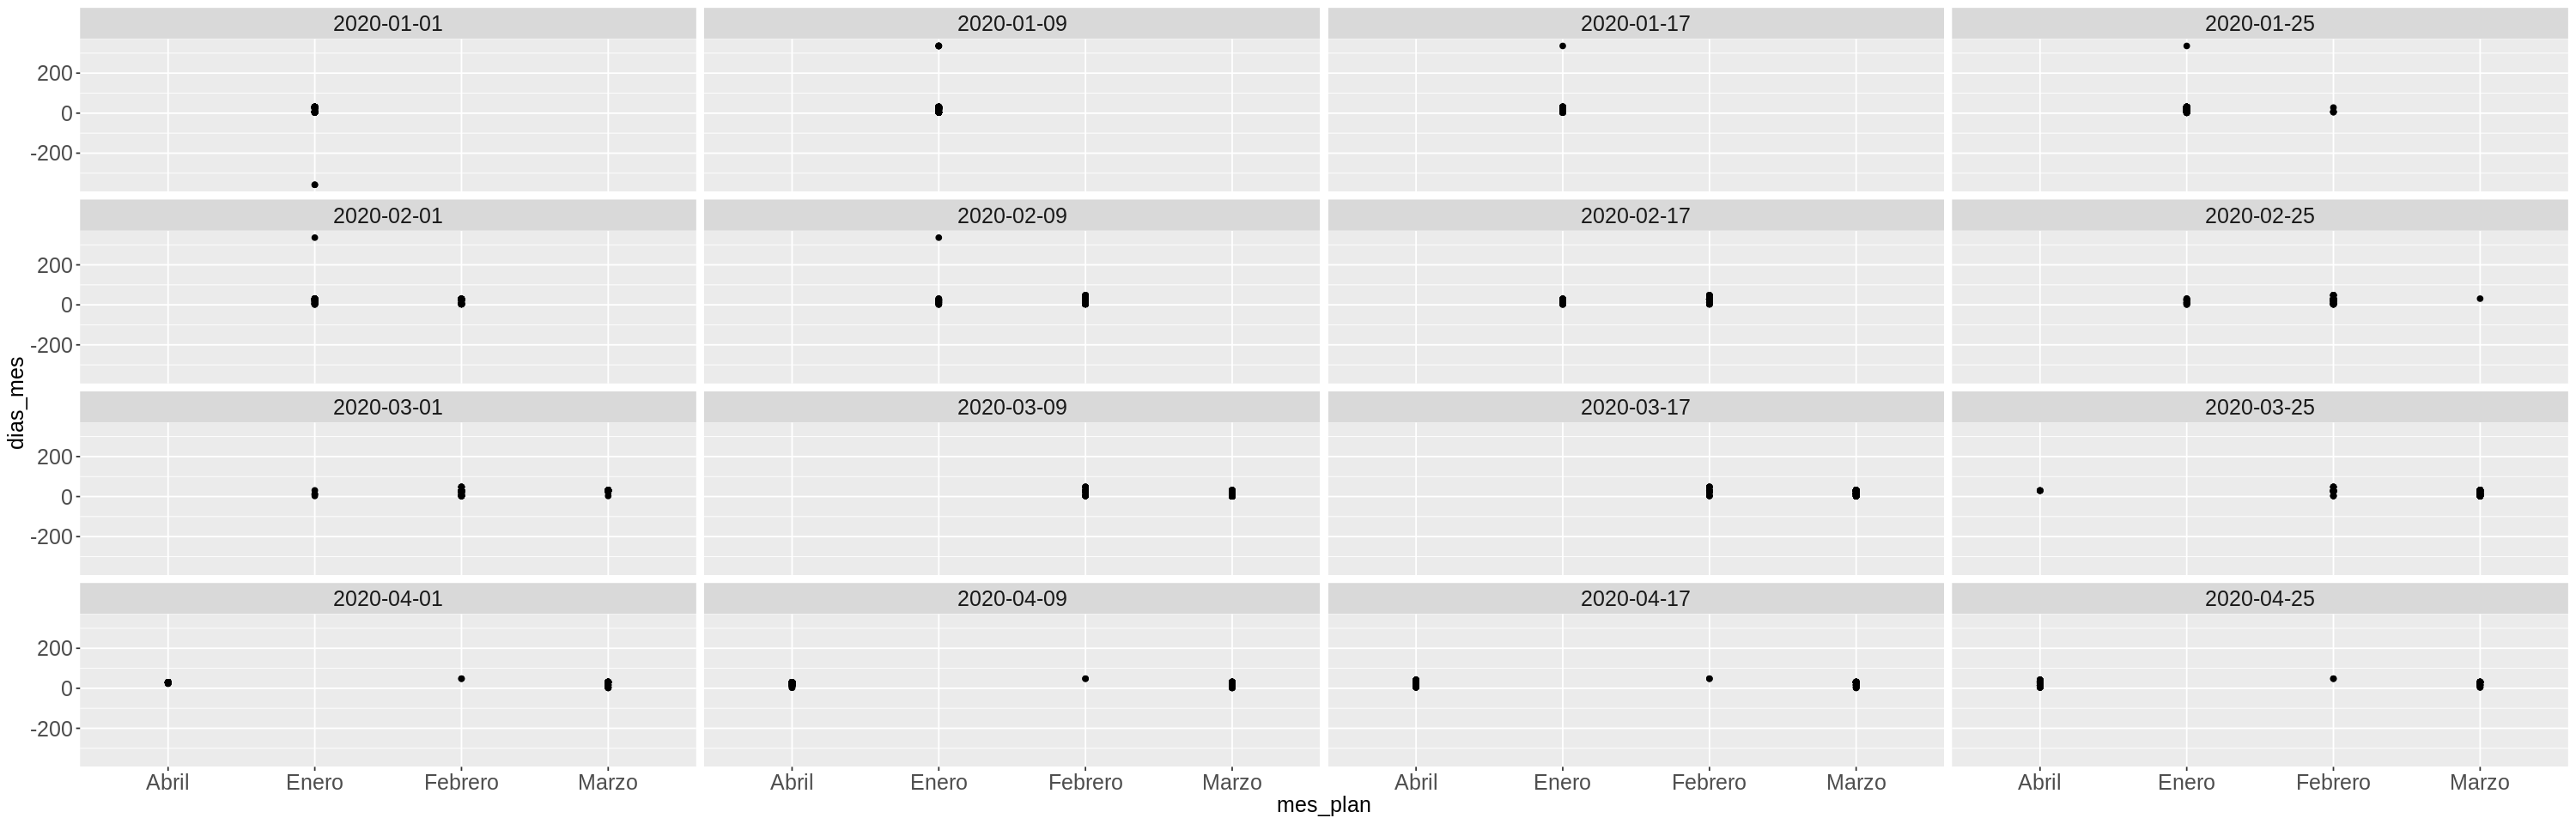

In [52]:
ggplot(base_roas, aes(x = mes_plan, y = dias_mes)) +
geom_point() +
theme(axis.text=element_text(size=15),
        axis.title=element_text(size=15)) +
facet_wrap(~inicio_reporte) +
theme(strip.text.x = element_text(size = 15))

**¿Como puedo saber la inversion del mp?**

In [65]:
#Conteo de campañas por mes
cuadrar_1 <- tmp %>%
  group_by(Año.Mes,mes_plan,plataforma,llave_unica_mp) %>%
  summarize(Conteo = n(), 
            inversión_total = mean(inversión_total,na.rm = TRUE),
            dinero_gastado = sum(dinero_gastado))

head(cuadrar_1, 10)

Año.Mes,mes_plan,plataforma,llave_unica_mp,Conteo,inversión_total,dinero_gastado
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
2001,Enero,Facebook,2001_gicsa_explanadapachuca_pi_mkt_fb_V2,4,38700,147222.64
2001,Enero,Facebook,2001_gicsa_explanadapuebla_pi_mkt_fb_V2,4,34400,137416.96
2001,Enero,Facebook,2001_gicsa_forumcuernavaca_pi_mkt_fb_V2,4,32680,128341.44
2001,Enero,Facebook,2001_gicsa_islamerida_pi_mkt_fb_V2,4,32680,130318.68
2001,Enero,Facebook,2001_gicsa_paseointerlomas_pi_mkt_fb_V2,5,47300,394737.55
2001,Enero,Facebook,2001_gicsa_paseoqueretaro_pi_mkt_fb_V2,5,79980,235004.40
2001,Enero,Facebook,2001_gwep_aurum_pi_pfm_fb_V2,1,15000,13290.20
2001,Enero,Facebook,2001_gwep_cortijo_pi_pfm_fb_V2,1,4000,3982.58
2001,Enero,Facebook,2001_gwep_cumbresherradura_pi_pfm_fb_V2,1,12000,11966.41


¿No tengo información demás en base roas?

Para esto cruzaremos la base master con el archivo KPIS 2020

Y podemos ver que la inversion del mp es igual que la inversion del archivo de KPIS

In [100]:
#Cruzamos kpis_1 y cuadrar_1 para validar que todas las cifras sean correctas
tmp <- left_join(cuadrar_1,
                 select(kpis_1, llave_unica_mp, inversion_total_original),
                 by = c("llave_unica_mp" = "llave_unica_mp"))

head(tmp)

Adding missing grouping variables: `Mes`, `Plataforma_abreviacion`, `Versión`, `NOMENCLATURA`


Año.Mes,mes_plan,plataforma,llave_unica_mp,Conteo,inversión_total,dinero_gastado,Mes,Plataforma_abreviacion,Versión,NOMENCLATURA,inversion_total_original
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
2001,Enero,Facebook,2001_gicsa_explanadapachuca_pi_mkt_fb_V2,4,38700,147222.6,Enero,fb,V2,2001_gicsa_explanadapachuca_pi_mkt,38700
2001,Enero,Facebook,2001_gicsa_explanadapuebla_pi_mkt_fb_V2,4,34400,137417.0,Enero,fb,V2,2001_gicsa_explanadapuebla_pi_mkt,34400
2001,Enero,Facebook,2001_gicsa_forumcuernavaca_pi_mkt_fb_V2,4,32680,128341.4,Enero,fb,V2,2001_gicsa_forumcuernavaca_pi_mkt,32680
2001,Enero,Facebook,2001_gicsa_islamerida_pi_mkt_fb_V2,4,32680,130318.7,Enero,fb,V2,2001_gicsa_islamerida_pi_mkt,32680
2001,Enero,Facebook,2001_gicsa_paseointerlomas_pi_mkt_fb_V2,5,47300,394737.5,Enero,fb,V2,2001_gicsa_paseointerlomas_pi_mkt,47300
2001,Enero,Facebook,2001_gicsa_paseoqueretaro_pi_mkt_fb_V2,5,79980,235004.4,Enero,fb,V2,2001_gicsa_paseoqueretaro_pi_mkt,79980


In [99]:
#Cruzamos kpis_1 y cuadrar_1 para validar que todas las cifras sean correctas
tmp <- left_join(cuadrar_1,
                 select(kpis_1, llave_unica_mp, inversion_total_original),
                 by = c("llave_unica_mp" = "llave_unica_mp"))

tmp['diferencia'] = tmp$`inversión_total` - tmp$inversion_total_original

a = filter(tmp, diferencia > 1)

a



Adding missing grouping variables: `Mes`, `Plataforma_abreviacion`, `Versión`, `NOMENCLATURA`


Año.Mes,mes_plan,plataforma,llave_unica_mp,Conteo,inversión_total,dinero_gastado,Mes,Plataforma_abreviacion,Versión,NOMENCLATURA,inversion_total_original,diferencia
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
2002,Febrero,Programmatic,2002_od_brother-impresion_ppf_pfm_dsp_V2,2,4054.16,14141.92,Febrero,dsp,V2,2002_od_brother-impresion_ppf_pfm,4053,1.16
2003,Marzo,Google Search,2003_od_brother-impresion_ppf_pfm_sem_V1,2,21521.77,34288.84,Marzo,sem,V1,2003_od_brother-impresion_ppf_pfm,21520,1.77


In [129]:
fn(sum(tmp$inversion_cuadra_mp, na.rm = TRUE))

fn(sum(tmp$`Inversión Total`, na.rm = TRUE))

[1] "12,297,705.9"

[1] "9,633,756"

Año.Mes,plataforma_abreviacion,versión,inversion_cuadra_mp,inversion_total,diferencia
<int>,<chr>,<chr>,<dbl>,<int>,<chr>
2001,DSP,Versión Cliente,86325.0,86325,0
2001,DSP,Versión Normal,430795.0,430795,0
2001,FB,Versión Cliente,114355.0,114355,0.00
2001,FB,Versión Normal,1795097.1,1129431,"665,666.06"
2001,PV_AdsMovil,Versión Cliente,13650.0,13650,0
2001,PV_AdsMovil,Versión Normal,369458.0,191008,"178,450"
2001,PV_Waze,Versión Normal,7740.0,7740,0
2001,SEM,Versión Cliente,65030.0,65030,0.00
2001,SEM,Versión Normal,281398.6,216888,"64,510.64"


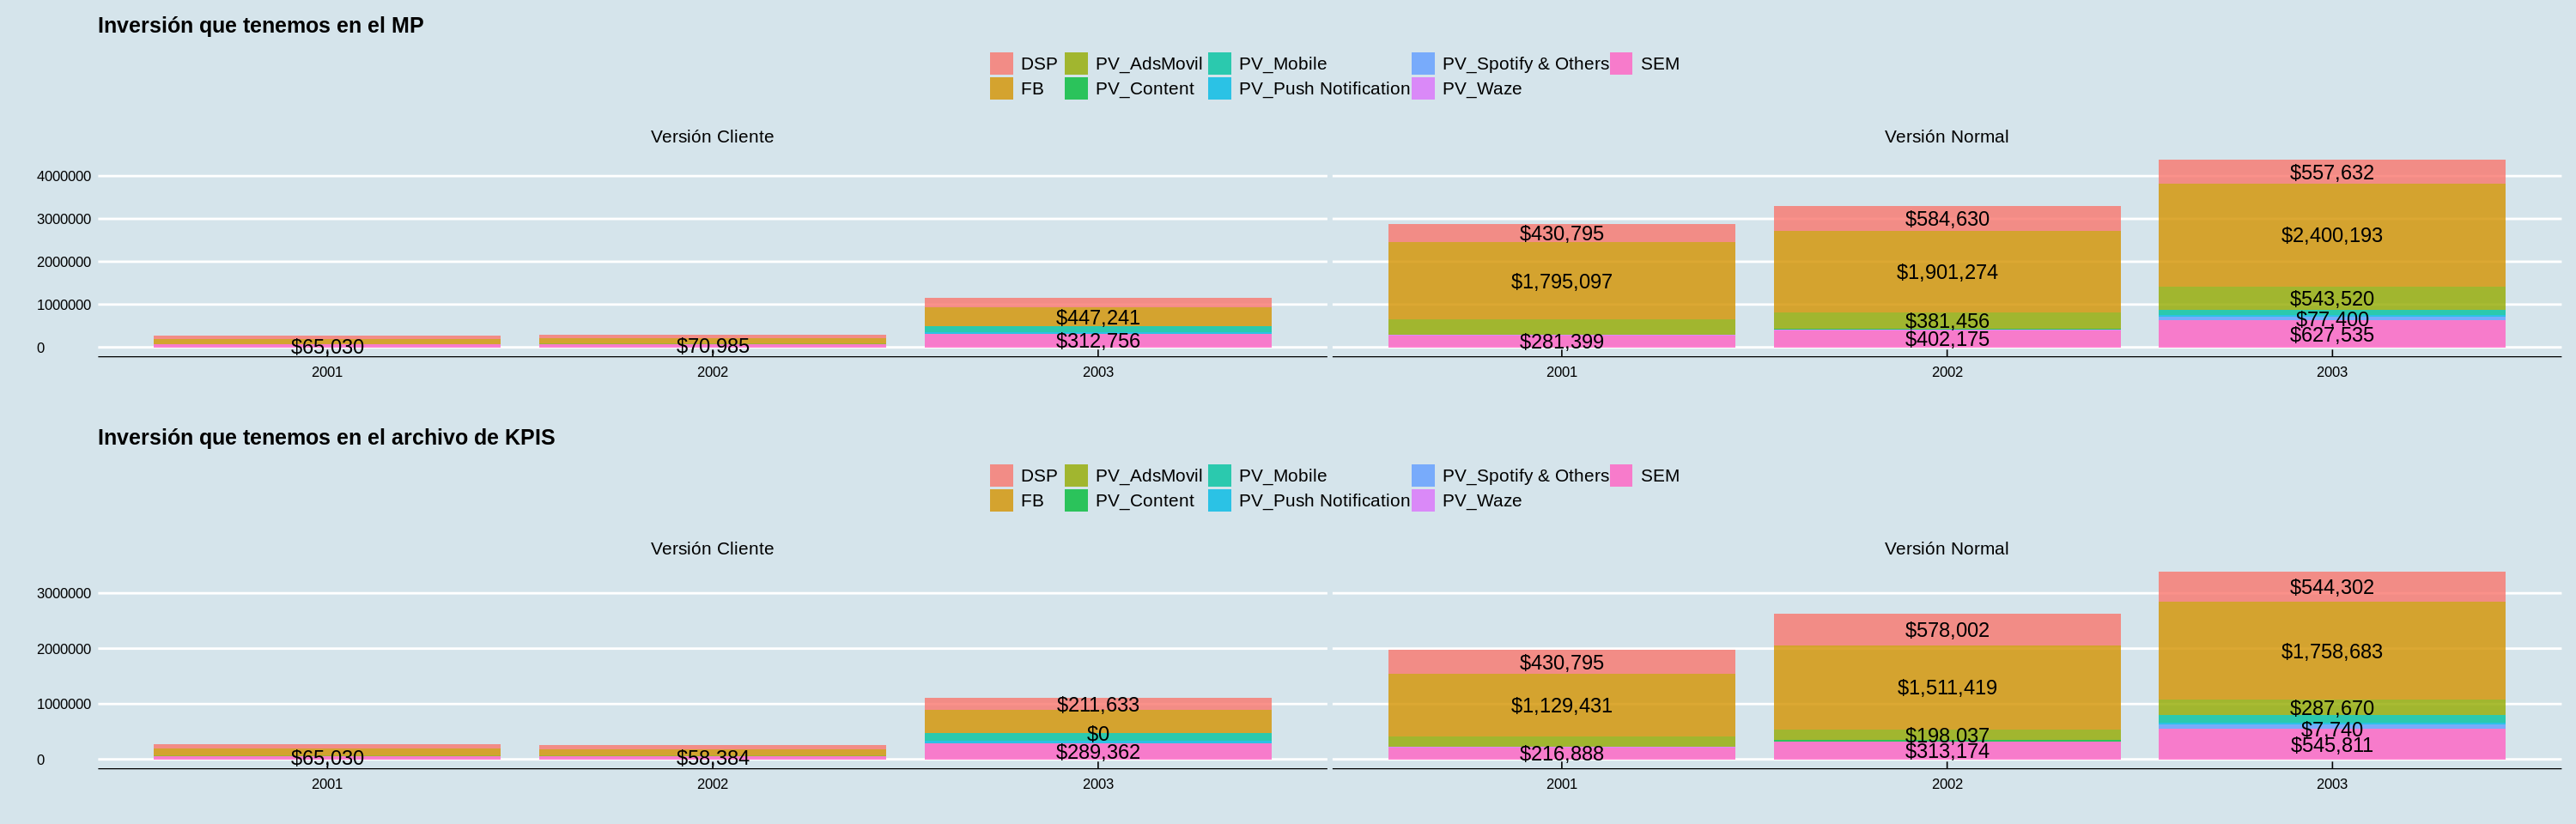

In [151]:
tmp_1 <- tmp %>% 
  group_by(Año.Mes,plataforma_abreviacion,versión) %>%
  summarize(inversion_cuadra_mp = sum(inversion_cuadra_mp,na.rm = TRUE),
            inversion_total = sum(`Inversión Total`, na.rm = TRUE)) %>%
            mutate(diferencia = fn(inversion_cuadra_mp - inversion_total))


head(tmp_1, 20)

#Graficas Inversion total base master roas
inversion_mp <- ggplot(tmp_1, aes(x = Año.Mes, y = inversion_cuadra_mp, fill = plataforma_abreviacion)) +
  geom_col(alpha = 0.8) +
  facet_wrap(~versión) +
  geom_text(aes(label = paste0("$",formatC(as.numeric(inversion_cuadra_mp), format="f", digits=0, big.mark=","))), position = position_stack(vjust = 0.5), size = 5,check_overlap = TRUE) +
  theme(axis.text.x = element_text(angle = 90)) +
  ggtitle(paste0("Inversión que tenemos en el MP")) +
  labs(fill = "") +
  ggthemes::theme_economist() +
  xlab("") +
  ylab("")

inversion_kpis <- ggplot(tmp_1, aes(x = Año.Mes, y = inversion_total, fill = plataforma_abreviacion)) +
  geom_col(alpha = 0.8) +
  facet_wrap(~versión) +
  geom_text(aes(label = paste0("$",formatC(as.numeric(inversion_total), format="f", digits=0, big.mark=","))), position = position_stack(vjust = 0.5), size = 5,check_overlap = TRUE) +
  theme(axis.text.x = element_text(angle = 90)) +
  ggtitle(paste0("Inversión que tenemos en el archivo de KPIS")) +
  labs(fill = "") +
  ggthemes::theme_economist() +
  xlab("") +
  ylab("")


grid.arrange(inversion_mp, inversion_kpis, nrow = 2, ncol = 1, as.table = TRUE)

In [152]:
cuadrar_2 <- cuadrar_1 %>% 
  group_by(Año.Mes,plataforma_abreviacion,versión) %>%
  summarize(Conteo = n(), inversion_cuadra_mp = sum(inversion_cuadra_mp,na.rm = TRUE))

head(cuadrar_2,20)

Año.Mes,plataforma_abreviacion,versión,Conteo,inversion_cuadra_mp
<int>,<chr>,<chr>,<int>,<dbl>
2001,DSP,Versión Cliente,9,86325.0
2001,DSP,Versión Normal,20,430795.0
2001,FB,Versión Cliente,24,114355.0
2001,FB,Versión Normal,56,1064077.1
2001,PV_AdsMovil,Versión Cliente,2,13650.0
2001,PV_AdsMovil,Versión Normal,8,191008.0
2001,PV_Waze,Versión Normal,6,7740.0
2001,SEM,Versión Cliente,23,65030.0
2001,SEM,Versión Normal,35,216898.6


In [153]:
cuadrar_3 <- cuadrar_2 %>% 
  group_by(Año.Mes,plataforma_abreviacion,versión) %>%
  summarize(inversion_cuadra_mp = sum(inversion_cuadra_mp,na.rm = TRUE))

head(cuadrar_3, 20)

Año.Mes,plataforma_abreviacion,versión,inversion_cuadra_mp
<int>,<chr>,<chr>,<dbl>
2001,DSP,Versión Cliente,86325.0
2001,DSP,Versión Normal,430795.0
2001,FB,Versión Cliente,114355.0
2001,FB,Versión Normal,1064077.1
2001,PV_AdsMovil,Versión Cliente,13650.0
2001,PV_AdsMovil,Versión Normal,191008.0
2001,PV_Waze,Versión Normal,7740.0
2001,SEM,Versión Cliente,65030.0
2001,SEM,Versión Normal,216898.6


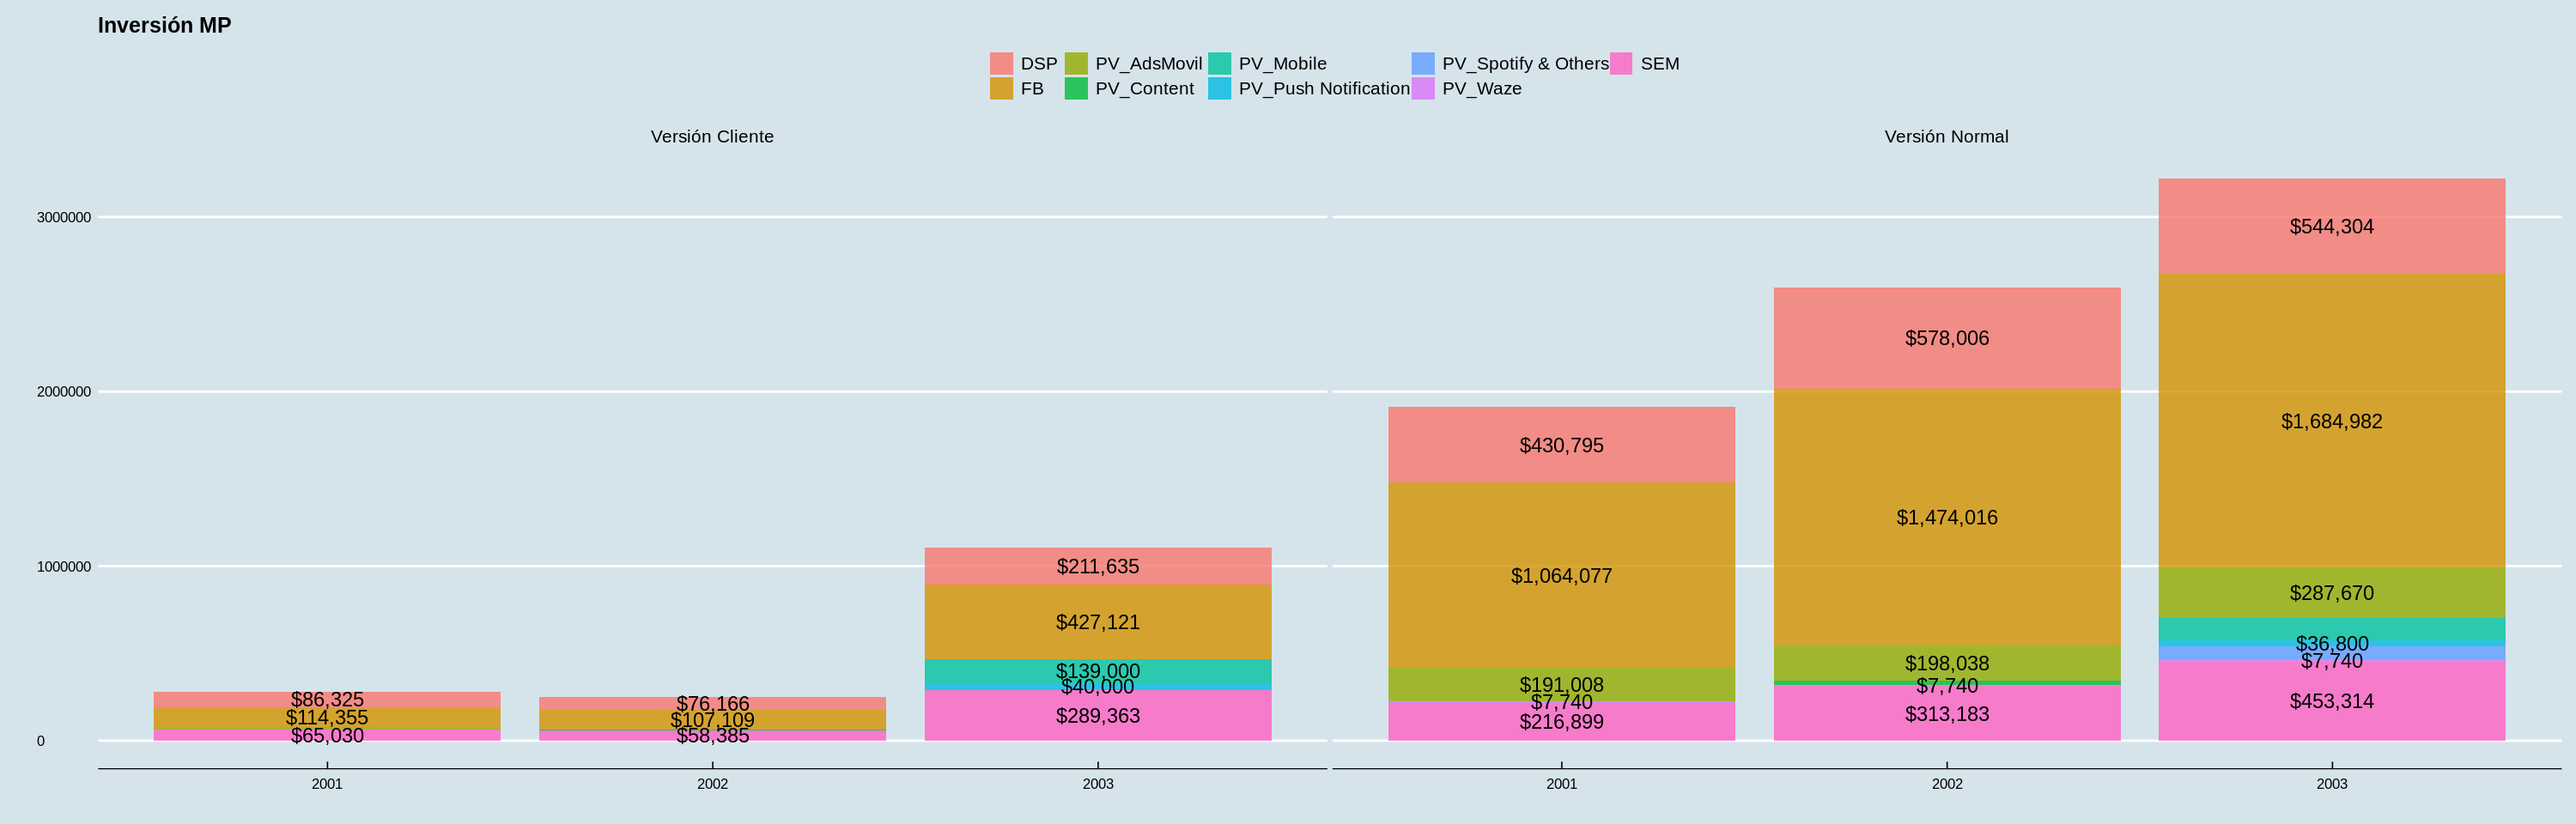

In [154]:
#Graficas Inversion total base master roas
inversion_todos <- ggplot(cuadrar_3, aes(x = Año.Mes, y = inversion_cuadra_mp, fill = plataforma_abreviacion)) +
  geom_col(alpha = 0.8) +
  facet_wrap(~versión) +
  geom_text(aes(label = paste0("$",formatC(as.numeric(inversion_cuadra_mp), format="f", digits=0, big.mark=","))), position = position_stack(vjust = 0.5), size = 5,check_overlap = TRUE) +
  theme(axis.text.x = element_text(angle = 90)) +
  ggtitle(paste0("Inversión MP")) +
  labs(fill = "") +
  ggthemes::theme_economist() +
  xlab("") +
  ylab("")

inversion_todos

## Validación de la información de los reportes semanles

In [20]:
names(base_roas_kpis)

table(base_roas_kpis$inicio_reporte)


[1] "X"                      "cliente"                "cliente_nomenclatura"  
 [4] "marca"                  "llave_ventas"           "llave_unica_mp"        
 [7] "versión"                "tipo_presupuesto"       "tipo_2"                
[10] "comentario"             "Año.Mes"                "mes_plan"              
[13] "campaña_nomenclatura"   "plataforma_x"           "plataforma_abreviacion"
[16] "fecha_inicio_plan"      "fecha_fin_plan"         "inicio_campaña"        
[19] "fin_campaña"            "dias_totales_campaña"   "costo_planeado"        
[22] "kpi_planeado"           "serving"                "inversión_plataforma"  
[25] "inversión_total"        "inversión_AdOps"        "Operativo_AdOps"       
[28] "Serving_AdOps"          "costo_operativo"        "semana"                
[31] "inicio_reporte"         "fin_reporte"            "inicio"                
[34] "fin"                    "dias_actividad_reporte" "inversión_planeada"    
[37] "inversión_mp"           "inversión_diaria"       "divisa"                
[40] "dinero_gastado"         "impresiones"            "clics"                 
[43] "ctr"                    "conversiones"           "revenue"               
[46] "llave_analytics"        "conversiones_directas"  "conversiones_asistidas"
[49] "revenue_directo"        "revenue_asistido"       "total_conversiones"    
[52] "total_revenue"          "roas"


2020-01-01 2020-01-09 2020-01-17 2020-01-25 2020-02-01 2020-02-09 2020-02-17 
        72        123        134        120        162        199        161 
2020-02-25 2020-03-01 2020-03-09 2020-03-17 2020-03-25 
       129        187        185        186         48 

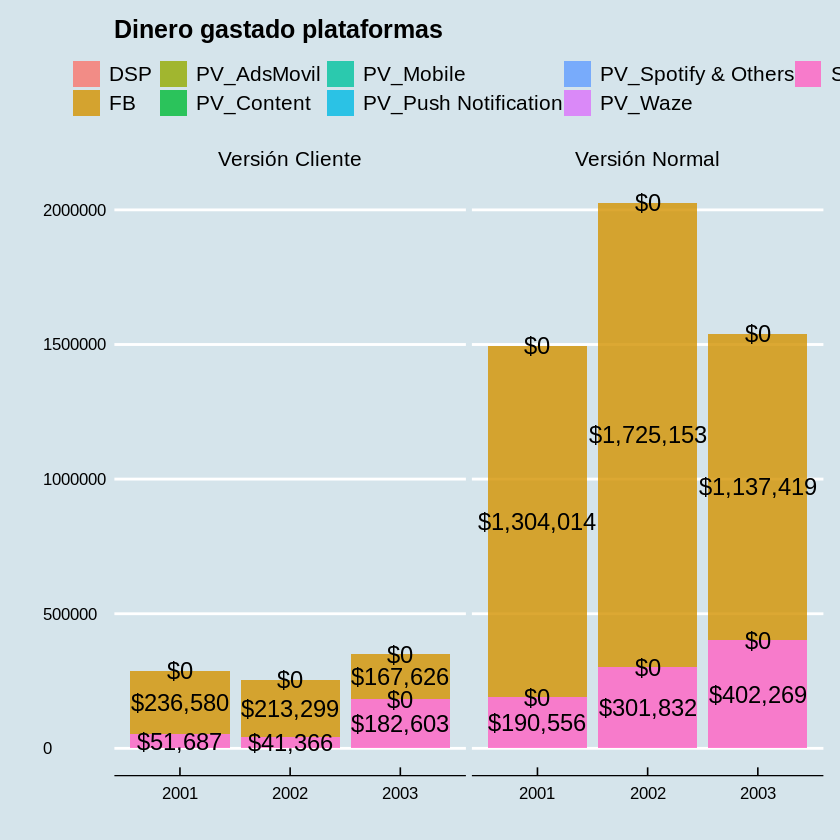

In [21]:
cuadrar_1_plt <- base_roas_kpis %>%
  group_by(Año.Mes,mes_plan,plataforma_abreviacion,plataforma_x,versión,llave_unica_mp,inicio_reporte) %>%
  summarize(Conteo = n(), dinero_gastado = sum(dinero_gastado,na.rm = TRUE))

cuadrar_2_plt <- cuadrar_1_plt %>% 
  group_by(Año.Mes,plataforma_abreviacion,versión) %>%
  summarize(Conteo = n(), dinero_gastado = sum(dinero_gastado, na.rm = TRUE))

cuadrar_2_plt$versión <- str_replace_all(cuadrar_2$versión, c("V1" = "Versión Normal",
                               "V2" = "Versión Normal",
                               "V3" = "Versión Normal",
                               "V4" = "Versión Normal",
                               "V5" = "Versión Normal",
                               "VC1" = "Versión Cliente",
                               "VC2" = "Versión Cliente",
                               "VC3" = "Versión Cliente"))

cuadrar_3_plt <- cuadrar_2_plt %>% 
  group_by(Año.Mes,plataforma_abreviacion,versión) %>%
  summarize(dinero_gastado = sum(dinero_gastado, na.rm = TRUE))

dinero_gastado <- ggplot(cuadrar_3_plt, aes(x = Año.Mes, y = dinero_gastado, fill = plataforma_abreviacion)) +
  geom_col(alpha = 0.8) +
  facet_wrap(~versión) +
  geom_text(aes(label = paste0("$",formatC(as.numeric(dinero_gastado), format="f", digits=0, big.mark=","))), position = position_stack(vjust = 0.5), size = 5,check_overlap = TRUE) +
  theme(axis.text.x = element_text(angle = 90)) +
  ggtitle(paste0("Dinero gastado plataformas")) +
  labs(fill = "") +
  ggthemes::theme_economist() +
  xlab("") +
  ylab("")

dinero_gastado